<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=91QljBnvM7s

In [0]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Mon Jan  6 01:16:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
openjdk version "11.0.5" 2019-10-15
OpenJDK Runtime Environment (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04)
OpenJDK 64-Bit Server VM (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04, mixed mode, sharing)


In [0]:
!pip install h2o

     |████████████████████████████████| 123.4MB 71kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.1-py2.py3-none-any.whl size=123410554 sha256=168ca8e2cbf809df8675b09983d1f1374c69d2043856b7abad946d0a207736eb
  Stored in directory: /root/.cache/pip/wheels/ff/82/f4/3fe9c895b93c53b25ae44dc44aa54dad571c711f48bc485fe9
Successfully built h2o


In [0]:
 import h2o

In [0]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.5" 2019-10-15; OpenJDK Runtime Environment (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04); OpenJDK 64-Bit Server VM (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0ikb58_p
  JVM stdout: /tmp/tmp0ikb58_p/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0ikb58_p/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_unknownUser_w5qqra
H2O cluster total nodes:,1
H2O cluster free memory:,2.938 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
from h2o.automl import H2OAutoML

In [0]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [0]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [0]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [0]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No


In [0]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [0]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [0]:
!nvidia-smi

Mon Jan  6 01:17:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
01:17:17.297: Project: AutoML_20200106_11717292
01:17:17.299: Cross validation disabled by user: no fold column nor nfolds > 1.
01:17:17.299: Setting stopping tolerance adaptively based on the training frame: 0.014236408049319776
01:17:17.299: Build control seed: 10
01:17:17.299: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
01:17:17.399: training frame: Frame key: automl_training_py_3_sid_87de    cols: 21    rows: 4454  chunks: 8    size: 294934  checksum: 5310680771849131343
01:17:17.399: validation frame: Frame key: py_5_sid_87de    cols: 21    rows: 1069  chunks: 8    size: 139382  checksum: -5299405090363570025
01:17:17.406: leaderboard frame: Frame key: automl_leaderboard_py_3_sid_87de    cols: 21    rows: 480  chunks: 8    size: 124576  checksum: 2229072054065022190
01:17:17.406: blending frame: NULL
01:17:17.406: response column: Churn
01

In [0]:
!nvidia-smi

Mon Jan  6 01:17:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    32W / 250W |    331MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
lb = aml.leaderboard

In [0]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_20200106_011717,0.837872,0.42428,0.646227,0.258862,0.371571,0.138065
XGBoost_3_AutoML_20200106_011717,0.837309,0.425259,0.643129,0.230902,0.372439,0.138711
GBM_5_AutoML_20200106_011717,0.836359,0.427113,0.642654,0.242762,0.374129,0.139972
XGBoost_1_AutoML_20200106_011717,0.83298,0.430737,0.632764,0.244882,0.375162,0.140747
GBM_1_AutoML_20200106_011717,0.831865,0.432989,0.636245,0.261379,0.375055,0.140666
GLM_1_AutoML_20200106_011717,0.831257,0.430245,0.646667,0.24243,0.376352,0.141641
GBM_4_AutoML_20200106_011717,0.826354,0.449559,0.610091,0.238554,0.381647,0.145654
GBM_3_AutoML_20200106_011717,0.826167,0.440873,0.642437,0.248758,0.377807,0.142738
GBM_2_AutoML_20200106_011717,0.825725,0.442284,0.610157,0.251143,0.380009,0.144407
DRF_1_AutoML_20200106_011717,0.817631,0.515702,0.607515,0.273239,0.382128,0.146022


In [0]:
churn_pred=aml.leader.predict(churn_test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [0]:
churn_pred.head()

predict,No,Yes
Yes,0.130665,0.869335
Yes,0.486019,0.513981
No,0.961202,0.0387979
No,0.826175,0.173825
Yes,0.480061,0.519939
No,0.82035,0.17965
Yes,0.159316,0.840684
No,0.9772,0.0228002
No,0.87115,0.12885
No,0.947038,0.0529623


In [0]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.12989202891170706
RMSE: 0.3604053674845965
LogLoss: 0.4034449942607744
Mean Per-Class Error: 0.21751434948979598
AUC: 0.8459995814732143
AUCPR: 0.6333245605498026
Gini: 0.6919991629464286

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2768990397453308: 


,,No,Yes,Error,Rate
0,No,593.0,191.0,0.2436,(191.0/784.0)
1,Yes,49.0,207.0,0.1914,(49.0/256.0)
2,Total,642.0,398.0,0.2308,(240.0/1040.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.276899,0.633028,222.0
1,max f2,0.200497,0.742838,261.0
2,max f0point5,0.543980,0.625000,103.0
3,max accuracy,0.543980,0.815385,103.0
4,max precision,0.917811,1.000000,0.0
5,max recall,0.024428,1.000000,389.0
6,max specificity,0.917811,1.000000,0.0
7,max absolute_mcc,0.276899,0.500720,222.0
8,max min_per_class_accuracy,0.299446,0.767857,211.0
9,max mean_per_class_accuracy,0.276899,0.782486,222.0



Gains/Lift Table: Avg response rate: 24.62 %, avg score: 26.00 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010577,0.880649,3.323864,3.323864,0.818182,0.903886,0.818182,0.903886,0.035156,0.035156,232.386364,232.386364
1,,2,0.020192,0.855068,3.656250,3.482143,0.900000,0.864420,0.857143,0.885093,0.035156,0.070312,265.625000,248.214286
2,,3,0.030769,0.825610,2.954545,3.300781,0.727273,0.841739,0.812500,0.870190,0.031250,0.101562,195.454545,230.078125
3,,4,0.040385,0.809157,3.250000,3.288690,0.800000,0.817316,0.809524,0.857601,0.031250,0.132812,225.000000,228.869048
4,,5,0.050000,0.779834,2.437500,3.125000,0.600000,0.793376,0.769231,0.845250,0.023438,0.156250,143.750000,212.500000
5,,6,0.100000,0.658079,2.812500,2.968750,0.692308,0.721111,0.730769,0.783180,0.140625,0.296875,181.250000,196.875000
6,,7,0.150000,0.553653,2.578125,2.838542,0.634615,0.603153,0.698718,0.723171,0.128906,0.425781,157.812500,183.854167
7,,8,0.200000,0.489896,1.875000,2.597656,0.461538,0.516815,0.639423,0.671582,0.093750,0.519531,87.500000,159.765625
8,,9,0.300000,0.352833,1.406250,2.200521,0.346154,0.417750,0.541667,0.586971,0.140625,0.660156,40.625000,120.052083
9,,10,0.400000,0.258981,1.640625,2.060547,0.403846,0.308348,0.507212,0.517315,0.164062,0.824219,64.062500,106.054688


In [0]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [0]:
model_ids

['XGBoost_2_AutoML_20200106_011717',
 'XGBoost_3_AutoML_20200106_011717',
 'GBM_5_AutoML_20200106_011717',
 'XGBoost_1_AutoML_20200106_011717',
 'GBM_1_AutoML_20200106_011717',
 'GLM_1_AutoML_20200106_011717',
 'GBM_4_AutoML_20200106_011717',
 'GBM_3_AutoML_20200106_011717',
 'GBM_2_AutoML_20200106_011717',
 'DRF_1_AutoML_20200106_011717']

In [0]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200106_011717


Model Summary: 


,,number_of_trees
0,,85.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11463685881524834
RMSE: 0.33858065333868137
LogLoss: 0.36311309011473725
Mean Per-Class Error: 0.18470830772382718
AUC: 0.8936131171891006
AUCPR: 0.7615483662521837
Gini: 0.7872262343782013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3606812246143818: 


,,No,Yes,Error,Rate
0,No,2752.0,502.0,0.1543,(502.0/3254.0)
1,Yes,284.0,916.0,0.2367,(284.0/1200.0)
2,Total,3036.0,1418.0,0.1765,(786.0/4454.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.360681,0.699771,206.0
1,max f2,0.235889,0.794122,265.0
2,max f0point5,0.583763,0.720965,116.0
3,max accuracy,0.495243,0.838348,151.0
4,max precision,0.923532,1.000000,0.0
5,max recall,0.022820,1.000000,394.0
6,max specificity,0.923532,1.000000,0.0
7,max absolute_mcc,0.379353,0.581268,197.0
8,max min_per_class_accuracy,0.315295,0.807007,226.0
9,max mean_per_class_accuracy,0.288407,0.815292,239.0



Gains/Lift Table: Avg response rate: 26.94 %, avg score: 27.35 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010103,0.882697,3.464222,3.464222,0.933333,0.901923,0.933333,0.901923,0.035000,0.035000,246.422222,246.422222
1,,2,0.020207,0.855541,3.711667,3.587944,1.000000,0.867949,0.966667,0.884936,0.037500,0.072500,271.166667,258.794444
2,,3,0.030085,0.829599,3.458598,3.545473,0.931818,0.843338,0.955224,0.871277,0.034167,0.106667,245.859848,254.547264
3,,4,0.040189,0.813237,3.134296,3.442104,0.844444,0.820567,0.927374,0.858529,0.031667,0.138333,213.429630,244.210428
4,,5,0.050067,0.791322,3.458598,3.445359,0.931818,0.801340,0.928251,0.847245,0.034167,0.172500,245.859848,244.535874
5,,6,0.100135,0.686146,2.962676,3.204017,0.798206,0.738535,0.863229,0.792890,0.148333,0.320833,196.267564,220.401719
6,,7,0.149978,0.599372,2.808829,3.072682,0.756757,0.639037,0.827844,0.741759,0.140000,0.460833,180.882883,207.268214
7,,8,0.200045,0.519963,2.097175,2.828532,0.565022,0.559085,0.762065,0.696039,0.105000,0.565833,109.717489,182.853161
8,,9,0.299955,0.383621,1.709869,2.455923,0.460674,0.449520,0.661677,0.613928,0.170833,0.736667,70.986891,145.592315
9,,10,0.400090,0.268587,1.198386,2.141186,0.322870,0.325506,0.576880,0.541741,0.120000,0.856667,19.838565,114.118593




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13200930891094706
RMSE: 0.36333085323289993
LogLoss: 0.4065191866668133
Mean Per-Class Error: 0.21935274064770793
AUC: 0.8530052929039204
AUCPR: 0.6761107367846269
Gini: 0.7060105858078407

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38777639468510944: 


,,No,Yes,Error,Rate
0,No,654.0,131.0,0.1669,(131.0/785.0)
1,Yes,84.0,200.0,0.2958,(84.0/284.0)
2,Total,738.0,331.0,0.2011,(215.0/1069.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.387776,0.650407,181.0
1,max f2,0.167549,0.754773,281.0
2,max f0point5,0.471985,0.644410,144.0
3,max accuracy,0.471985,0.810103,144.0
4,max precision,0.920657,1.000000,0.0
5,max recall,0.024334,1.000000,391.0
6,max specificity,0.920657,1.000000,0.0
7,max absolute_mcc,0.389219,0.513706,180.0
8,max min_per_class_accuracy,0.310758,0.764085,217.0
9,max mean_per_class_accuracy,0.248484,0.780647,244.0



Gains/Lift Table: Avg response rate: 26.57 %, avg score: 27.18 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010290,0.898883,3.764085,3.764085,1.000000,0.910360,1.000000,0.910360,0.038732,0.038732,276.408451,276.408451
1,,2,0.020580,0.874588,3.079706,3.421895,0.818182,0.887892,0.909091,0.899126,0.031690,0.070423,207.970551,242.189501
2,,3,0.030870,0.844898,3.764085,3.535958,1.000000,0.858250,0.939394,0.885500,0.038732,0.109155,276.408451,253.595817
3,,4,0.040225,0.821185,3.387676,3.501474,0.900000,0.830053,0.930233,0.872606,0.031690,0.140845,238.767606,250.147396
4,,5,0.050514,0.791687,3.421895,3.485263,0.909091,0.808192,0.925926,0.859484,0.035211,0.176056,242.189501,248.526343
5,,6,0.100094,0.672021,2.130614,2.814269,0.566038,0.715380,0.747664,0.788105,0.105634,0.281690,113.061387,181.426879
6,,7,0.150608,0.590287,2.230569,2.618494,0.592593,0.632172,0.695652,0.735805,0.112676,0.394366,123.056860,161.849357
7,,8,0.200187,0.526436,2.343675,2.550431,0.622642,0.558755,0.677570,0.691956,0.116197,0.510563,134.367526,155.043109
8,,9,0.300281,0.393655,1.758918,2.286593,0.467290,0.449514,0.607477,0.611142,0.176056,0.686620,75.891799,128.659339
9,,10,0.400374,0.281592,1.196064,2.013961,0.317757,0.337617,0.535047,0.542761,0.119718,0.806338,19.606424,101.396110




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-01-06 01:17:25,0.002 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.730579,0.500000,0.693147,0.500000,0.000000,1.000000,0.734331
1,,2020-01-06 01:17:26,0.322 sec,5.0,0.451306,0.599465,0.864095,0.650674,3.486717,0.225415,0.451369,0.599555,0.855019,0.612469,3.450411,0.197381
2,,2020-01-06 01:17:26,0.543 sec,10.0,0.417875,0.537171,0.867374,0.700870,3.484422,0.204311,0.418241,0.537659,0.858810,0.677673,3.513146,0.201123
3,,2020-01-06 01:17:26,0.788 sec,15.0,0.395782,0.494959,0.870006,0.707311,3.474752,0.210597,0.397467,0.497480,0.858590,0.688202,3.450411,0.207671
4,,2020-01-06 01:17:26,1.005 sec,20.0,0.381068,0.465116,0.871990,0.713065,3.469601,0.210597,0.383858,0.469220,0.860119,0.682457,3.764085,0.217961
5,,2020-01-06 01:17:26,1.244 sec,25.0,0.370788,0.442708,0.873594,0.720191,3.464222,0.209699,0.374983,0.448909,0.860153,0.685266,3.764085,0.208606
6,,2020-01-06 01:17:27,1.433 sec,30.0,0.363515,0.425682,0.874957,0.720912,3.464222,0.207678,0.369251,0.434260,0.859561,0.683473,3.474540,0.208606
7,,2020-01-06 01:17:27,1.600 sec,35.0,0.358498,0.413048,0.876798,0.728192,3.464222,0.198249,0.366187,0.424738,0.859056,0.682699,3.474540,0.199252
8,,2020-01-06 01:17:27,1.855 sec,40.0,0.354522,0.402953,0.879462,0.732853,3.464222,0.201617,0.364337,0.418383,0.858242,0.684977,3.450411,0.192703
9,,2020-01-06 01:17:27,2.064 sec,45.0,0.351564,0.394884,0.880912,0.735681,3.464222,0.175573,0.362666,0.412550,0.858552,0.686469,3.764085,0.202058



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,3655.777832,1.000000,0.256163
1,TotalCharges,2007.098267,0.549021,0.140639
2,tenure,1818.509888,0.497434,0.127424
3,MonthlyCharges,1745.274536,0.477402,0.122292
4,TechSupport.No,732.165771,0.200276,0.051303
5,OnlineSecurity.No,715.071289,0.195600,0.050105
6,InternetService.Fiberoptic,570.084229,0.155941,0.039946
7,Contract.Twoyear,481.123566,0.131606,0.033713
8,PaymentMethod.Electroniccheck,284.173859,0.077733,0.019912
9,PaperlessBilling.No,220.357941,0.060277,0.015441



See the whole table with table.as_data_frame()


In [0]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [0]:
out.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 1.0, 'default': 1.0},
 'colsample_bytree': {'actual': 1.0, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gamma': {'actual': 0.0, 'default': 0.0},
 'gpu_id': {'actual': 0, 'default': 0},
 'grow_policy': {'actual': 'd

In [0]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.05,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 20,
  'min_child_weight': 10.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 11,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'auto'},
 10000)

In [0]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200106_011717


Model Summary: 


,,number_of_trees
0,,85.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11463685881524834
RMSE: 0.33858065333868137
LogLoss: 0.36311309011473725
Mean Per-Class Error: 0.18470830772382718
AUC: 0.8936131171891006
AUCPR: 0.7615483662521837
Gini: 0.7872262343782013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3606812246143818: 


,,No,Yes,Error,Rate
0,No,2752.0,502.0,0.1543,(502.0/3254.0)
1,Yes,284.0,916.0,0.2367,(284.0/1200.0)
2,Total,3036.0,1418.0,0.1765,(786.0/4454.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.360681,0.699771,206.0
1,max f2,0.235889,0.794122,265.0
2,max f0point5,0.583763,0.720965,116.0
3,max accuracy,0.495243,0.838348,151.0
4,max precision,0.923532,1.000000,0.0
5,max recall,0.022820,1.000000,394.0
6,max specificity,0.923532,1.000000,0.0
7,max absolute_mcc,0.379353,0.581268,197.0
8,max min_per_class_accuracy,0.315295,0.807007,226.0
9,max mean_per_class_accuracy,0.288407,0.815292,239.0



Gains/Lift Table: Avg response rate: 26.94 %, avg score: 27.35 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010103,0.882697,3.464222,3.464222,0.933333,0.901923,0.933333,0.901923,0.035000,0.035000,246.422222,246.422222
1,,2,0.020207,0.855541,3.711667,3.587944,1.000000,0.867949,0.966667,0.884936,0.037500,0.072500,271.166667,258.794444
2,,3,0.030085,0.829599,3.458598,3.545473,0.931818,0.843338,0.955224,0.871277,0.034167,0.106667,245.859848,254.547264
3,,4,0.040189,0.813237,3.134296,3.442104,0.844444,0.820567,0.927374,0.858529,0.031667,0.138333,213.429630,244.210428
4,,5,0.050067,0.791322,3.458598,3.445359,0.931818,0.801340,0.928251,0.847245,0.034167,0.172500,245.859848,244.535874
5,,6,0.100135,0.686146,2.962676,3.204017,0.798206,0.738535,0.863229,0.792890,0.148333,0.320833,196.267564,220.401719
6,,7,0.149978,0.599372,2.808829,3.072682,0.756757,0.639037,0.827844,0.741759,0.140000,0.460833,180.882883,207.268214
7,,8,0.200045,0.519963,2.097175,2.828532,0.565022,0.559085,0.762065,0.696039,0.105000,0.565833,109.717489,182.853161
8,,9,0.299955,0.383621,1.709869,2.455923,0.460674,0.449520,0.661677,0.613928,0.170833,0.736667,70.986891,145.592315
9,,10,0.400090,0.268587,1.198386,2.141186,0.322870,0.325506,0.576880,0.541741,0.120000,0.856667,19.838565,114.118593




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13200930891094706
RMSE: 0.36333085323289993
LogLoss: 0.4065191866668133
Mean Per-Class Error: 0.21935274064770793
AUC: 0.8530052929039204
AUCPR: 0.6761107367846269
Gini: 0.7060105858078407

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38777639468510944: 


,,No,Yes,Error,Rate
0,No,654.0,131.0,0.1669,(131.0/785.0)
1,Yes,84.0,200.0,0.2958,(84.0/284.0)
2,Total,738.0,331.0,0.2011,(215.0/1069.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.387776,0.650407,181.0
1,max f2,0.167549,0.754773,281.0
2,max f0point5,0.471985,0.644410,144.0
3,max accuracy,0.471985,0.810103,144.0
4,max precision,0.920657,1.000000,0.0
5,max recall,0.024334,1.000000,391.0
6,max specificity,0.920657,1.000000,0.0
7,max absolute_mcc,0.389219,0.513706,180.0
8,max min_per_class_accuracy,0.310758,0.764085,217.0
9,max mean_per_class_accuracy,0.248484,0.780647,244.0



Gains/Lift Table: Avg response rate: 26.57 %, avg score: 27.18 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010290,0.898883,3.764085,3.764085,1.000000,0.910360,1.000000,0.910360,0.038732,0.038732,276.408451,276.408451
1,,2,0.020580,0.874588,3.079706,3.421895,0.818182,0.887892,0.909091,0.899126,0.031690,0.070423,207.970551,242.189501
2,,3,0.030870,0.844898,3.764085,3.535958,1.000000,0.858250,0.939394,0.885500,0.038732,0.109155,276.408451,253.595817
3,,4,0.040225,0.821185,3.387676,3.501474,0.900000,0.830053,0.930233,0.872606,0.031690,0.140845,238.767606,250.147396
4,,5,0.050514,0.791687,3.421895,3.485263,0.909091,0.808192,0.925926,0.859484,0.035211,0.176056,242.189501,248.526343
5,,6,0.100094,0.672021,2.130614,2.814269,0.566038,0.715380,0.747664,0.788105,0.105634,0.281690,113.061387,181.426879
6,,7,0.150608,0.590287,2.230569,2.618494,0.592593,0.632172,0.695652,0.735805,0.112676,0.394366,123.056860,161.849357
7,,8,0.200187,0.526436,2.343675,2.550431,0.622642,0.558755,0.677570,0.691956,0.116197,0.510563,134.367526,155.043109
8,,9,0.300281,0.393655,1.758918,2.286593,0.467290,0.449514,0.607477,0.611142,0.176056,0.686620,75.891799,128.659339
9,,10,0.400374,0.281592,1.196064,2.013961,0.317757,0.337617,0.535047,0.542761,0.119718,0.806338,19.606424,101.396110




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-01-06 01:17:25,0.002 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.730579,0.500000,0.693147,0.500000,0.000000,1.000000,0.734331
1,,2020-01-06 01:17:26,0.322 sec,5.0,0.451306,0.599465,0.864095,0.650674,3.486717,0.225415,0.451369,0.599555,0.855019,0.612469,3.450411,0.197381
2,,2020-01-06 01:17:26,0.543 sec,10.0,0.417875,0.537171,0.867374,0.700870,3.484422,0.204311,0.418241,0.537659,0.858810,0.677673,3.513146,0.201123
3,,2020-01-06 01:17:26,0.788 sec,15.0,0.395782,0.494959,0.870006,0.707311,3.474752,0.210597,0.397467,0.497480,0.858590,0.688202,3.450411,0.207671
4,,2020-01-06 01:17:26,1.005 sec,20.0,0.381068,0.465116,0.871990,0.713065,3.469601,0.210597,0.383858,0.469220,0.860119,0.682457,3.764085,0.217961
5,,2020-01-06 01:17:26,1.244 sec,25.0,0.370788,0.442708,0.873594,0.720191,3.464222,0.209699,0.374983,0.448909,0.860153,0.685266,3.764085,0.208606
6,,2020-01-06 01:17:27,1.433 sec,30.0,0.363515,0.425682,0.874957,0.720912,3.464222,0.207678,0.369251,0.434260,0.859561,0.683473,3.474540,0.208606
7,,2020-01-06 01:17:27,1.600 sec,35.0,0.358498,0.413048,0.876798,0.728192,3.464222,0.198249,0.366187,0.424738,0.859056,0.682699,3.474540,0.199252
8,,2020-01-06 01:17:27,1.855 sec,40.0,0.354522,0.402953,0.879462,0.732853,3.464222,0.201617,0.364337,0.418383,0.858242,0.684977,3.450411,0.192703
9,,2020-01-06 01:17:27,2.064 sec,45.0,0.351564,0.394884,0.880912,0.735681,3.464222,0.175573,0.362666,0.412550,0.858552,0.686469,3.764085,0.202058



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,3655.777832,1.000000,0.256163
1,TotalCharges,2007.098267,0.549021,0.140639
2,tenure,1818.509888,0.497434,0.127424
3,MonthlyCharges,1745.274536,0.477402,0.122292
4,TechSupport.No,732.165771,0.200276,0.051303
5,OnlineSecurity.No,715.071289,0.195600,0.050105
6,InternetService.Fiberoptic,570.084229,0.155941,0.039946
7,Contract.Twoyear,481.123566,0.131606,0.033713
8,PaymentMethod.Electroniccheck,284.173859,0.077733,0.019912
9,PaperlessBilling.No,220.357941,0.060277,0.015441



See the whole table with table.as_data_frame()


In [0]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [0]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3606812246143818: 


,,No,Yes,Error,Rate
0,No,2752.0,502.0,0.1543,(502.0/3254.0)
1,Yes,284.0,916.0,0.2367,(284.0/1200.0)
2,Total,3036.0,1418.0,0.1765,(786.0/4454.0)


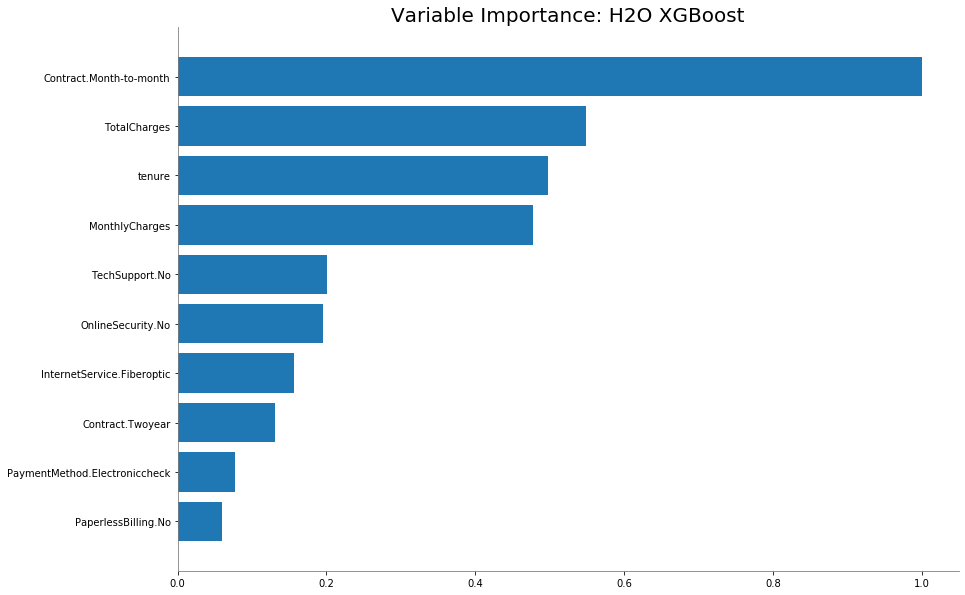

In [0]:
out.varimp_plot()

In [0]:
aml.leader.download_mojo(path = "./")

'/content/XGBoost_2_AutoML_20200106_011717.zip'